# K-means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from intro_Data_5 import *
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans, kmeans_plusplus

## 1. Fake data with two features

In [3]:
# Read the data
data = pd.read_csv('data/test_data_kmeans.csv')
data.head()

,Var1,Var2
0,-9.482456,3.617581
1,-7.290632,4.430300
2,-0.088279,-8.640152
3,-7.275795,3.132772
4,-8.252843,2.989601


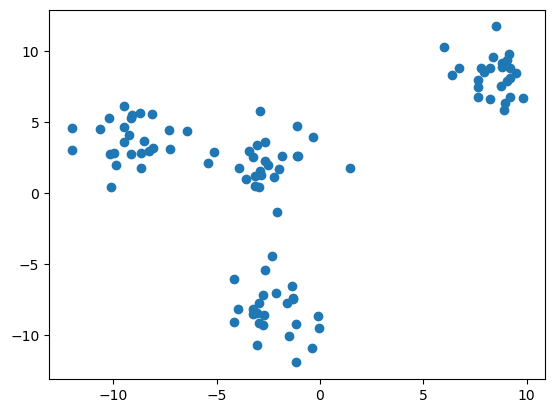

In [4]:
plt.scatter(data['Var1'], data['Var2'], alpha = 1.)

In [5]:
# Do K-means with n_clusters=4

from sklearn.cluster import KMeans

X = data.values


km = KMeans(n_clusters=4, random_state=146, n_init=10) #K-means++ initialization is used by default
km.fit(X) # what is this doing?



KMeans(n_clusters=4, n_init=10, random_state=146)

In [6]:
# get cluster centers
km.cluster_centers_

array([[-2.54799703,  2.22426148],
       [ 8.38539231,  8.31476255],
       [-2.24195689, -8.2834242 ],
       [-9.20306789,  3.81787074]])

In [7]:
# get predicted groups
groups = km.predict(X)
groups

array([3, 3, 2, 3, 3, 3, 3, 3, 0, 1, 1, 2, 0, 2, 1, 3, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 3, 3, 0, 0, 2, 0, 1, 3, 2, 0, 3, 0, 0, 3, 0, 1, 0, 3, 2,
       1, 1, 3, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2, 0, 1, 0, 0, 2, 2, 1, 2,
       0, 0, 0, 2, 1, 2, 3, 3, 1, 2, 1, 3, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1,
       3, 3, 0, 1, 1, 0, 0, 3, 1, 1, 0, 3], dtype=int32)

In [8]:
# An alternative way
groups = km.labels_
groups

array([3, 3, 2, 3, 3, 3, 3, 3, 0, 1, 1, 2, 0, 2, 1, 3, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 3, 3, 0, 0, 2, 0, 1, 3, 2, 0, 3, 0, 0, 3, 0, 1, 0, 3, 2,
       1, 1, 3, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2, 0, 1, 0, 0, 2, 2, 1, 2,
       0, 0, 0, 2, 1, 2, 3, 3, 1, 2, 1, 3, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1,
       3, 3, 0, 1, 1, 0, 0, 3, 1, 1, 0, 3], dtype=int32)

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

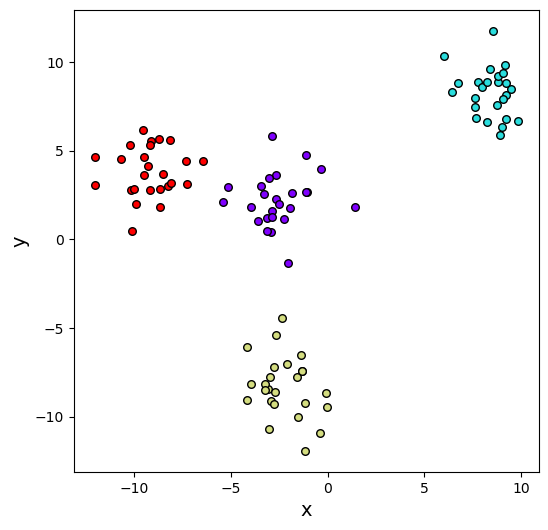

In [9]:
plot_groups(X, groups, colors = get_colors(4))

In [10]:
km.score(X) # what is the score?

-360.83330039841513

It returns the <b>negative of inertia</b>. Inertia is the mean squared distance between each instance and its closest centroid, also called <b>within cluster variance</b>.

### Tuning n_clusters using km.score()

In [11]:
# Get scores for a range of n_clusters
scores=[]
k_range = np.arange(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=146, n_init=10) 
    km.fit(X)
    scores.append(km.score(X))
scores

[-8028.849618957128,
 -3296.1089936530784,
 -946.2027826444734,
 -360.83330039841513,
 -314.3878257968411,
 -276.7255467439338,
 -240.59615125385656,
 -210.03855457029013,
 -186.03636024336996,
 -168.33765515579287]

In [12]:
# Plot the score-n_clusters curve

plt.plot(k_range, scores, S)
plt.xlabel('n_clusters')
plt.xticks(k_range)
plt.ylabel('Score')
plt.show()

NameError: name 'S' is not defined

Let's take a look at this:

https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

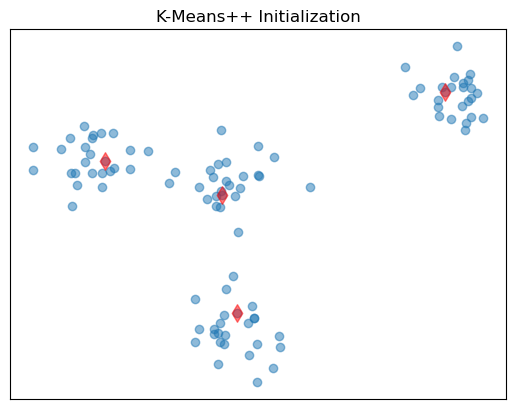

In [13]:
# Visualize initialized centroids with K-Means++

centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=200)


plt.scatter(X[:,0],X[:,1], alpha = 0.5)
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="r", s=80, marker = 'd', alpha = 0.5)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()


In [14]:
print(np.shape(centers_init), np.shape(indices))
print(indices)
print(centers_init)

(4, 2) (4,)
[26 50 69 78]
[[-8.49022399  3.67831587]
 [ 7.94771132  8.56400121]
 [-2.10869974 -7.02313428]
 [-2.858053    1.2629213 ]]


## 2. Real data and combining dimension reduction methods

In [15]:
# Read data
data = pd.read_csv('data/some_data.csv') 
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
# Do standard scaling (why?)
from sklearn.preprocessing import StandardScaler as SS
X = SS().fit_transform(data.values)


In [17]:
# Get scores for a range of n_clusters

scores0=[]
scores1=[]
scores2=[]
scores3=[]
k_range = np.arange(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=146, n_init=10, init = 'random')
    km.fit(X)
    km1 = KMeans(n_clusters=k, random_state=146, n_init=2, init = 'random')
    km1.fit(X)    
    km2 = KMeans(n_clusters=k, random_state=146, n_init=10, init='k-means++')
    km2.fit(X)    
    km3 = KMeans(n_clusters=k, random_state=146, n_init='auto', init='k-means++')
    km3.fit(X) 
    scores0.append(km.score(X))
    scores1.append(km1.score(X))    
    scores2.append(km2.score(X))
    scores3.append(km3.score(X))

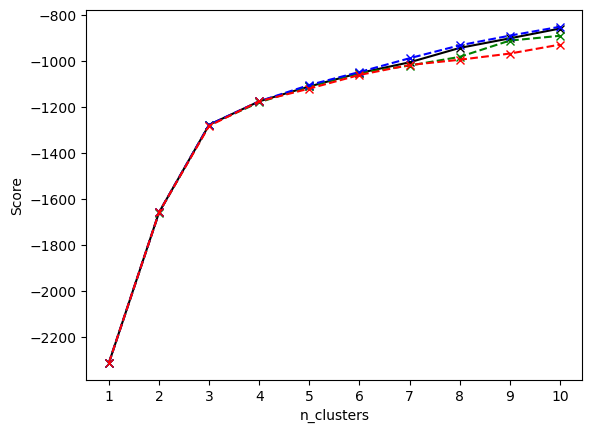

In [18]:
# Plot the score-n_clusters curve
plt.plot(k_range, scores0, '-xk')
plt.plot(k_range, scores1, '--xg')
plt.plot(k_range, scores2, '--xb')
plt.plot(k_range, scores3, '--xr')
plt.xlabel('n_clusters')
plt.xticks(k_range)
plt.ylabel('Score')
plt.show()

The `elbow' it's not too 'clear'. Let's try <b>dimension reduction</b> and take a look

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

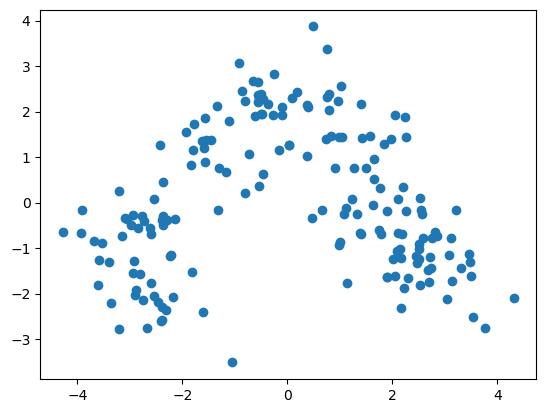

In [20]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)
plt.scatter(pca_X[:,0], pca_X[:,1])

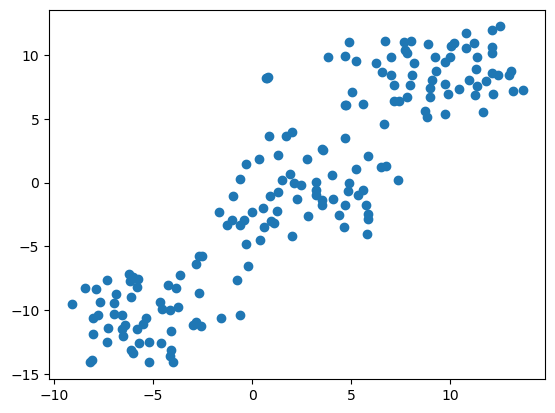

In [21]:
tsne = TSNE(random_state = 146)
tsne_X = tsne.fit_transform(X)
plt.scatter(tsne_X[:,0], tsne_X[:,1])

In [22]:
#Let's try 3 and shade in the points on PCA and tSNE
km = KMeans(n_clusters=3, n_init='auto')
km.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [23]:
groups = km.predict(X)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [24]:
km.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

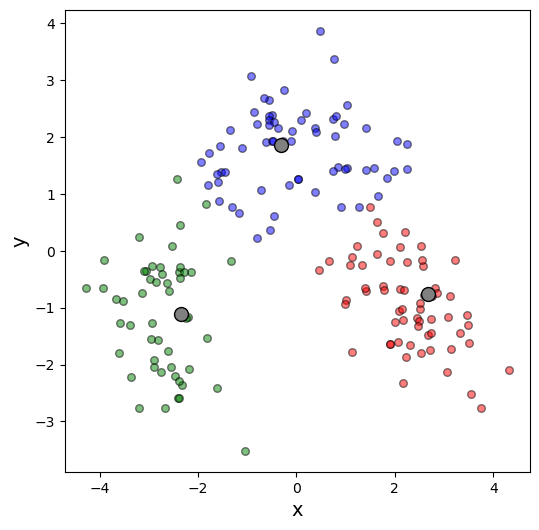

In [25]:
# Plot the clusters and the centroids (using first two PCs of PCA) 

fig,ax = plot_groups(pca_X, groups, colors = ['red','blue','green'], labels = ['PC1','PC2'], alpha = 0.5)
plot_groups(pca.fit_transform(km.cluster_centers_), np.unique(groups), colors = ['grey']*3, ax=ax, s= 100,
           alpha = 1)

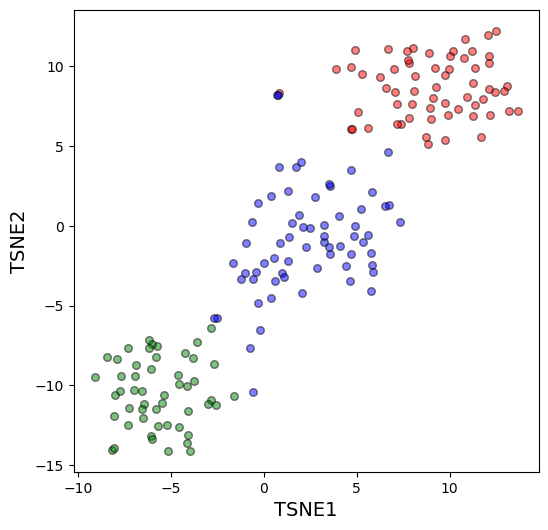

In [26]:
# Plot the clusters using TSNE

fig, ax = plot_groups(tsne_X, groups, colors = ['red','blue','green'], labels = ['TSNE1','TSNE2'], alpha = 0.5)

# plt.xticks([])
# plt.yticks([])

Actually we do know how many groups there are and which points go in which group....let's see if they match the clusters

In [27]:
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [28]:
real_groups = pd.read_csv('data/Metadata.csv', index_col=0)
real_groups = real_groups['0'].values
real_groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Anything wrong?

In [29]:
# The labels of groups 1 and 2 are reversed. Let's switch them over.
#temp = groups == 0

change2 = groups == 2

change1 = groups == 1

#groups[temp] = 2
groups[change2] = 1
groups[change1] = 2



In [30]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.35


Predicted,0,1,2
Actual,,,
0,59,0,0
1,3,3,65
2,0,48,0


The above is just to show that the groups in unsupervised learning are usually <b>NOT pre-defined</b>. <br>
In practice, we cannot compute confusion matrix for unsupervised learning, since we have no idea what the actual labels are for the groups that the data points belong to.

## The DNA dataset 

In [31]:
full_data = pd.read_csv('data/DNA_full_data.csv')
full_data.head()

,AAAA,AAAC,AAAT,AAAG,AACA,AACC,AACT,AACG,AATA,AATC,...,GGCT,GGCG,GGTA,GGTC,GGTT,GGTG,GGGA,GGGC,GGGT,GGGG
0,0.003590,0.003675,0.004523,0.002541,0.005437,0.002962,0.003883,0.004101,0.005245,0.005914,...,0.002811,0.003309,0.002535,0.003914,0.002962,0.004354,0.002910,0.001840,0.002707,0.001785
1,0.003195,0.003714,0.003834,0.002509,0.005379,0.003127,0.003652,0.004227,0.004291,0.006100,...,0.002825,0.003506,0.002371,0.004111,0.003127,0.004668,0.003233,0.001972,0.002921,0.001995
2,0.003269,0.004386,0.005131,0.002317,0.006207,0.003393,0.003807,0.003434,0.006910,0.007365,...,0.001945,0.002441,0.002317,0.003393,0.003393,0.004345,0.002897,0.001200,0.002938,0.002441
3,0.003142,0.004164,0.003300,0.001964,0.006442,0.002907,0.004085,0.004557,0.005264,0.006285,...,0.002121,0.003614,0.001493,0.004399,0.002907,0.003849,0.002514,0.002043,0.002593,0.002121
4,0.004763,0.003297,0.006137,0.002473,0.005404,0.003114,0.003297,0.003252,0.007007,0.006183,...,0.002473,0.002977,0.002107,0.003114,0.003114,0.004488,0.002244,0.002107,0.002610,0.002244


In [32]:
#pca_Full = pca.fit_transform(SS().fit_transform(full_data.values))
pca_Full = pca.fit_transform(full_data.values)

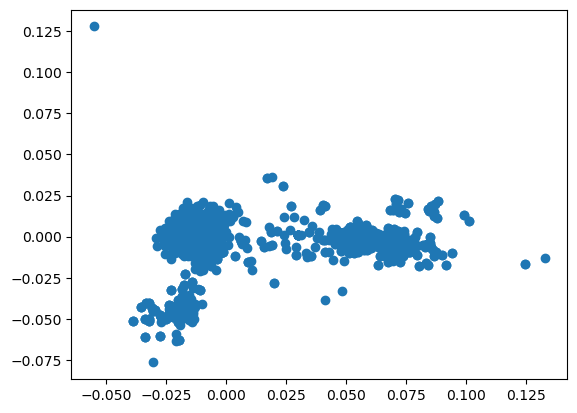

In [33]:
plt.scatter(pca_Full[:,0], pca_Full[:,1])

In [34]:
# Get scores for a range of n_clusters

scorespca=[]
k_range = np.arange(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=146, n_init=10)
    km.fit(X)
    scorespca.append(km.score(X))

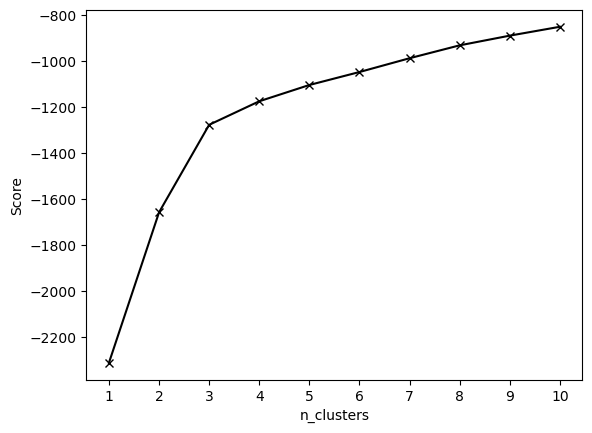

In [35]:
# Plot the score-n_clusters curve
plt.plot(k_range, scorespca, '-xk')
plt.xlabel('n_clusters')
plt.xticks(k_range)
plt.ylabel('Score')
plt.show()

In [36]:
km = KMeans(n_clusters = 3, random_state = 146, n_init=10)

In [ ]:
km.fit(full_data.values)

In [ ]:
full_predictions = km.predict(full_data.values)

In [ ]:
full_predictions

In [ ]:
km.labels_

In [ ]:
#Let's just look at the data labels
labels = pd.read_csv('data/DNA_labels.csv', index_col = 0)
labels

In [ ]:
np.unique(full_predictions)

In [ ]:
conf_matrix, accuracy = compare_classes(labels['Sequence_ID'].values, full_predictions)
conf_matrix

In [ ]:
#This tells us which sequences should actually go together
mapping = {0:'Halo', 1:'Helico', 2:'Taq'}
new_full = pd.Series(full_predictions).apply(lambda x: mapping[x] ).values
new_full

In [ ]:
conf_matrix, accuracy = compare_classes(labels['Sequence_ID'].values, new_full)
conf_matrix